# Loan Prediction using Logistic regression



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load data using pandas dataset

In [2]:
clim = pd.read_csv(r'loans.csv')
clim.shape

(9578, 14)

In [3]:
clim.head(6)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0.0,0.0,0.0,0


In [4]:
clim.shape

(9578, 14)

### Convert categorical data to nemerical data eg:0,1,2,3

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=clim['purpose'].append(clim['purpose'])
le.fit(data.values)
print("Different Categories", le.classes_)
clim['purpose'] = le.transform(clim['purpose'])

Different Categories ['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']


In [6]:
clim.head(6)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0.0,0.0,0.0,0


### omit row with empty values in data

In [7]:
clim = clim.dropna(axis=0, how='any')

In [8]:
data_array = clim.values

In [9]:
data_array

array([[1.    , 2.    , 0.1189, ..., 0.    , 0.    , 0.    ],
       [1.    , 1.    , 0.1071, ..., 0.    , 0.    , 0.    ],
       [1.    , 2.    , 0.1357, ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 2.    , 0.1071, ..., 0.    , 0.    , 1.    ],
       [0.    , 4.    , 0.16  , ..., 0.    , 0.    , 1.    ],
       [0.    , 2.    , 0.1392, ..., 0.    , 0.    , 1.    ]])

In [10]:
X = data_array[:, 0:13]

In [11]:
Y = data_array[:, 13]

In [12]:
X.shape

(9516, 13)

##### Observe the drop in rows

In [13]:
print(X)

[[1.     2.     0.1189 ... 0.     0.     0.    ]
 [1.     1.     0.1071 ... 0.     0.     0.    ]
 [1.     2.     0.1357 ... 1.     0.     0.    ]
 ...
 [0.     2.     0.1071 ... 8.     0.     0.    ]
 [0.     4.     0.16   ... 5.     0.     0.    ]
 [0.     2.     0.1392 ... 6.     0.     0.    ]]


<img src="https://image.slidesharecdn.com/machine-learning-and-data-mining-14-evaluation-and-credibility-28463/95/machine-learning-and-data-mining-14-evaluation-and-credibility-19-728.jpg?cb=1176687268">

## Logistic Regression
<img src="https://cdn-images-1.medium.com/max/1600/1*zLfpo6F_Bfi6uvRL6iLX_Q.jpeg">

<img src="http://www.saedsayad.com/images/LogReg_1.png">

Iteration 1:

In [14]:
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)
model =  LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_pred = model.predict(x_test)

### Confusion Matrix
<img src="http://bulletbyte.weebly.com/uploads/8/7/4/9/87495510/6.png">

#### Understand false positive and false negative
<img src="https://whatsthebigdata.files.wordpress.com/2017/01/errors.jpg?w=640">

##### Confusion matrix implication
<img src="https://i.stack.imgur.com/OW5Lt.jpg">

In [16]:
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_pred, y_test)
cm.print_stats()

population: 2855
P: 9
N: 2846
PositiveTest: 456
NegativeTest: 2399
TP: 4
TN: 2394
FP: 452
FN: 5
TPR: 0.4444444444444444
TNR: 0.8411806043569923
PPV: 0.008771929824561403
NPV: 0.9979157982492706
FPR: 0.15881939564300773
FDR: 0.9912280701754386
FNR: 0.5555555555555556
ACC: 0.8399299474605955
F1_score: 0.017204301075268817
MCC: 0.043705636449535706
informedness: 0.2856250488014367
markedness: 0.006687728073832
prevalence: 0.0031523642732049035
LRP: 2.7984267453294
LRN: 0.6604474148333798
DOR: 4.23716814159292
FOR: 0.0020842017507294707


### model Accuracy

In [17]:
cm.ACC

0.8399299474605955

### Corelation Matrix and Plotting 
ref: http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software 
<img src="http://www.sthda.com/sthda/RDoc/figure/ggplot2/ggplot2-correlation-matrix-heatmap-add-correlation-coefficients-1.png">

In [18]:
rets = clim.pct_change()

#Compute Correlation
corr = rets.corr()


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clim', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


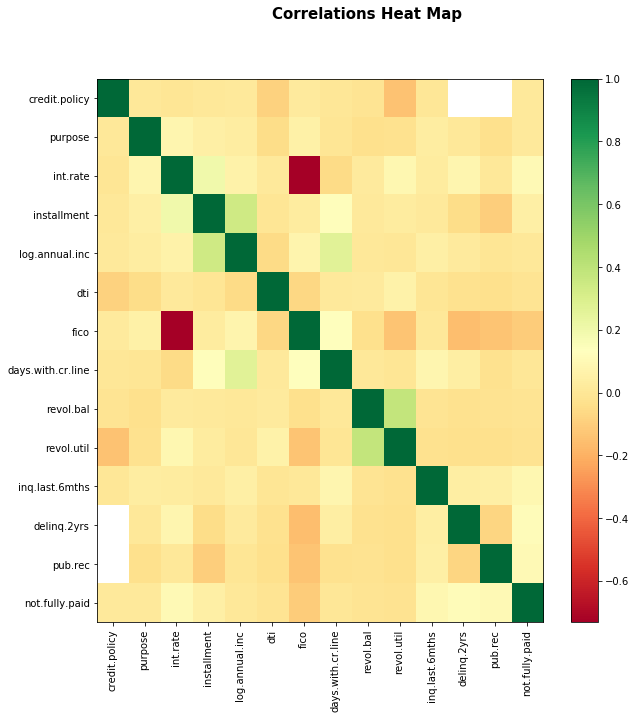

In [19]:
#Plot Correlation Matrix using Matplotlib
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn' ,interpolation='none', aspect='auto', )
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle('Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

#### using Seaborn with Values

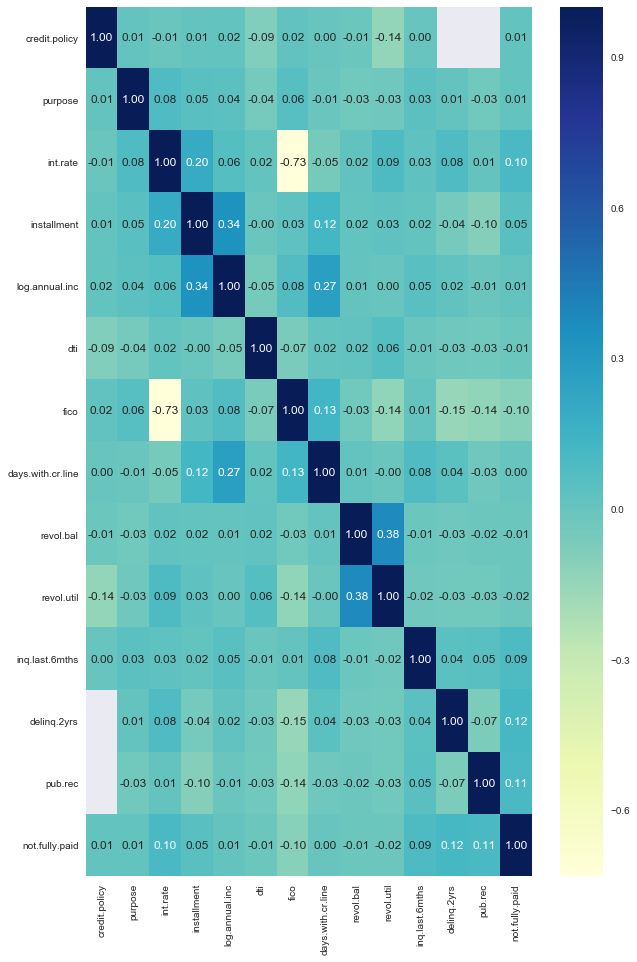

In [20]:
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure
figure(figsize=(10, 16))#resize the subplot size
ax = sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f")

#### Observe and remove highly correlated variable

In [21]:
X_new = np.delete(X, 2, 1)#remove 3rd column having int.rate
X_new = np.delete(X_new, 4, 1)#remove 5rd column having dti
X_new = np.delete(X_new, 5, 1)#remove 6th column having days.with.cr.line
X_new = np.delete(X_new, 4, 1)#remove 6th column having revol.bal
X_new = np.delete(X_new, 7, 1)#remove 7th column having pub.rec
print(X_new.shape)
X_new

(9516, 8)


array([[  1.  ,   2.  , 829.1 , ...,  52.1 ,   0.  ,   0.  ],
       [  1.  ,   1.  , 228.22, ...,  76.7 ,   0.  ,   0.  ],
       [  1.  ,   2.  , 366.86, ...,  25.6 ,   1.  ,   0.  ],
       ...,
       [  0.  ,   2.  ,  97.81, ...,  82.9 ,   8.  ,   0.  ],
       [  0.  ,   4.  , 351.58, ...,   3.2 ,   5.  ,   0.  ],
       [  0.  ,   2.  , 853.43, ...,  57.  ,   6.  ,   0.  ]])

In [22]:
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, stratify=Y, random_state=42)
model =  LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_pred, y_test)
cm.print_stats()

population: 2855
P: 10
N: 2845
PositiveTest: 456
NegativeTest: 2399
TP: 4
TN: 2393
FP: 452
FN: 6
TPR: 0.4
TNR: 0.8411247803163444
PPV: 0.008771929824561403
NPV: 0.9974989578991247
FPR: 0.15887521968365553
FDR: 0.9912280701754386
FNR: 0.6
ACC: 0.8395796847635727
F1_score: 0.017167381974248927
MCC: 0.038885298311344574
informedness: 0.24112478031634454
markedness: 0.006270887723686114
prevalence: 0.0035026269702276708
LRP: 2.517699115044248
LRN: 0.7133305474300042
DOR: 3.529498525073746
FOR: 0.0025010421008753647
